# Группировка данных

In [2]:
import pandas as pd

bikes = pd.read_pickle('BikesDataVars.pkl')

In [ ]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [ ]:
bikes['Temperature Category'].value_counts()

,count
Temperature Category,
Chilly,3112
Nice,2778
Freezing,1412
Hot,1279


In [ ]:
bikes['Temperature Category'].value_counts(dropna=False)

,count
Temperature Category,
Chilly,3112
Nice,2778
Freezing,1412
Hot,1279
NaN,179


In [ ]:
bikes['Good Weather'].value_counts()

,count
Good Weather,
0,7948
1,812


In [ ]:
bikes.groupby('Date')['Rental Count'].sum()

,Rental Count
Date,
2017-12-01,9802
2017-12-02,8404
2017-12-03,8644
2017-12-04,9556
2017-12-05,6578
...,...
2018-11-26,13934
2018-11-27,13964
2018-11-28,17378


In [ ]:
len(list(bikes.groupby('Date')))

365

In [ ]:
list(bikes.groupby('Date'))[0][0]

Timestamp('2017-12-01 00:00:00')

In [ ]:
list(bikes.groupby('Date'))[0][1].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [ ]:
bikes['Seasons'].value_counts()

,count
Seasons,
Spring,2208
Summer,2208
Autumn,2184
Winter,2160


In [ ]:
bikes.groupby('Seasons').size()

,0
Seasons,
Autumn,2184
Spring,2208
Summer,2208
Winter,2160


In [ ]:
bikes.groupby('Seasons')['Temperature Category'].value_counts()

Seasons  Temperature Category
Autumn   Chilly                  1138
         Nice                     894
         Hot                       86
         Freezing                  20
Spring   Chilly                  1224
         Nice                     881
         Hot                       27
         Freezing                  22
Summer   Hot                     1166
         Nice                    1003
         Chilly                     0
         Freezing                   0
Winter   Freezing                1370
         Chilly                   750
         Hot                        0
         Nice                       0
Name: count, dtype: int64

In [ ]:
bikes.groupby('Seasons')['Normal Humidity'].sum()

,Normal Humidity
Seasons,
Autumn,773
Spring,687
Summer,786
Winter,779


In [ ]:
bikes.groupby('Seasons')['Rental Count'].sum()

,Rental Count
Seasons,
Autumn,1769901
Spring,1608905
Summer,2239926
Winter,483327


In [ ]:
bikes.groupby(['Seasons', 'Temperature Category'])['Rental Count'].sum()

<ipython-input-15-d3f03a4848e5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bikes.groupby(['Seasons', 'Temperature Category'])['Rental Count'].sum()


Seasons  Temperature Category
Autumn   Chilly                   775694
         Freezing                  12035
         Hot                      134156
         Nice                     811498
Spring   Chilly                   587211
         Freezing                   6331
         Hot                       52993
         Nice                     928572
Summer   Chilly                        0
         Freezing                      0
         Hot                     1315525
         Nice                     892664
Winter   Chilly                   215221
         Freezing                 258570
         Hot                           0
         Nice                          0
Name: Rental Count, dtype: int64

<Axes: >

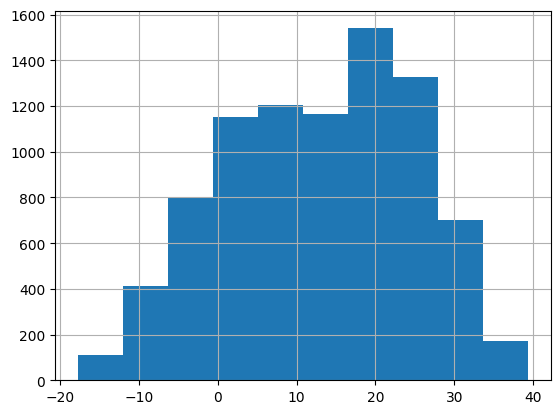

In [ ]:
bikes['Temperature'].hist()

-17.8
39.4


<Axes: >

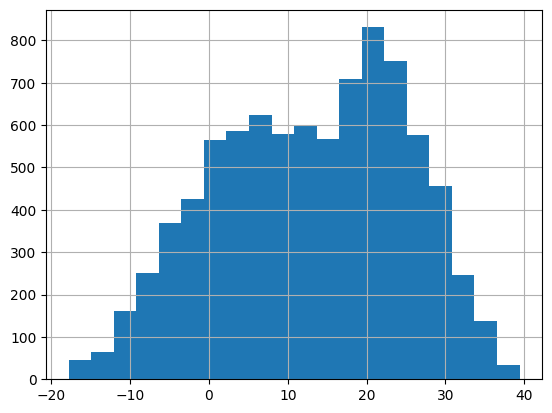

In [ ]:
print(min(bikes['Temperature']))
print(max(bikes['Temperature']))

bikes['Temperature'].hist(bins=20)

<Axes: xlabel='Temperature Category'>

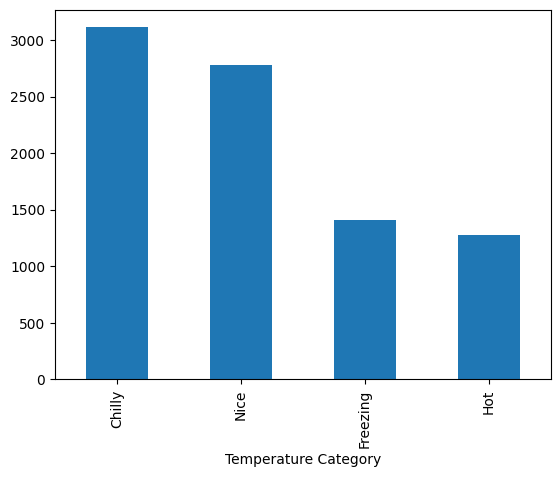

In [ ]:
bikes['Temperature Category'].value_counts().plot(kind='bar')

<ipython-input-19-b8335721b4d6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bikes.groupby('Temperature Category').size().plot(kind='bar')


<Axes: xlabel='Temperature Category'>

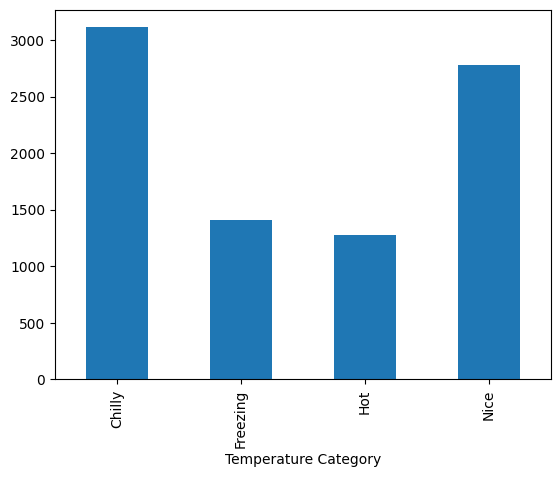

In [ ]:
bikes.groupby('Temperature Category').size().plot(kind='bar')

<Axes: xlabel='Seasons,Temperature Category'>

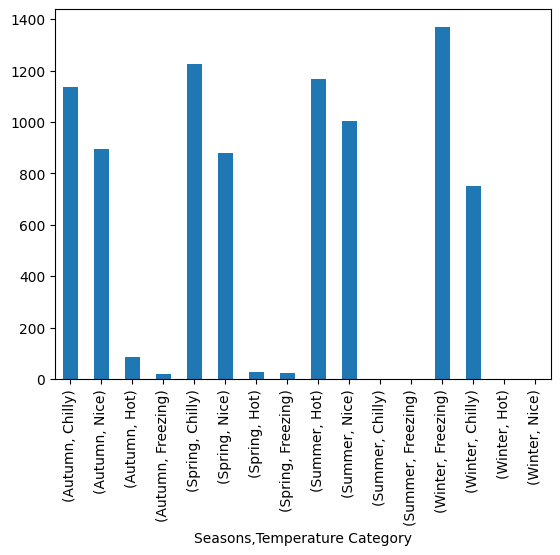

In [ ]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().plot(kind='bar')

In [3]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack()

Temperature Category,Chilly,Freezing,Hot,Nice
Seasons,,,,
Autumn,1138,20,86,894
Spring,1224,22,27,881
Summer,0,0,1166,1003
Winter,750,1370,0,0


In [ ]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind='bar')

In [ ]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind='bar',
                                                                               stacked=True)